# Assignment IV: AB Testing, a Statistical Test, and a Dashboard

### By Ranfei Xu

In [1]:
%cd E:\22FALL\AD654\Assgn\AssngIV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dt = pd.read_csv("campaign_data.csv")
dt.head()

E:\22FALL\AD654\Assgn\AssngIV


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,42.79


# Part I: A/B Testing Sales Promotion Strategies

### A. Generate a barplot to show the average SalesInThousands values, separated by the different promotion types.

<AxesSubplot:xlabel='Promotion'>

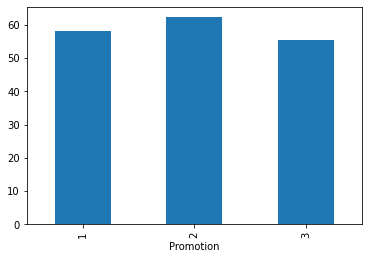

In [2]:
dt.groupby('Promotion')['SalesInThousands'].mean().plot.bar()

Answer: Based on the average sales of 3 different promotion campaigns, we can see Promotion 2 is more effective than Promotion 1 and then Promotion 3. But not a that significant difference.

### B. You want to make sure that the promotions were evenly-balanced across time.

Create another barplot -- this time, build a barplot that shows the number of instances in which each of the promotions was held. Include the ‘week’ variable in your plot, too

Text(0, 0.5, 'Sales In Thousands')

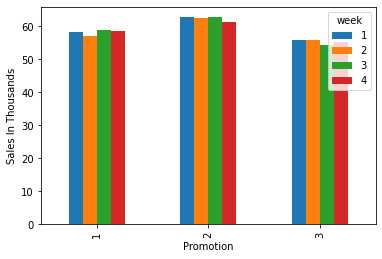

In [3]:
# https://medium.com/analytics-vidhya/create-a-grouped-bar-chart-with-matplotlib-and-pandas-9b021c97e0a
dt_pivot = pd.pivot_table(
    dt,
    values="SalesInThousands",
    index="Promotion",
    columns="week",
    aggfunc=np.mean
)
# Plot a bar chart using the DF
plt = dt_pivot.plot(kind="bar")
# Change the axes labels
plt.set_xlabel("Promotion")
plt.set_ylabel("Sales In Thousands")

Answer: In this experiment, for each promotion, the experiment records the sales in the same store weekly, which can detect whether there is a difference in sales performance among different weeks. According to the plot above, there is only a slight difference in sales performance with random features. So we can conclude that variable 'week' does not effect the sales performance, so it is not a confounding variable for this experiment.

### C. Next, generate some summary stats here -- group the observations by ‘Promotion’ and then describe the store ages.

In [4]:
dt.groupby('Promotion').describe().round(2)[['AgeOfStore','SalesInThousands']]

AgeOfStore                                        SalesInThousands  \
               count  mean   std  min  25%  50%   75%   max            count   
Promotion                                                                      
1              172.0  8.28  6.64  1.0  3.0  6.0  12.0  27.0            172.0   
2              188.0  7.98  6.60  1.0  3.0  7.0  10.0  28.0            188.0   
3              188.0  9.23  6.65  1.0  5.0  8.0  12.0  24.0            188.0   

                                                             
            mean    std    min    25%    50%    75%     max  
Promotion                                                    
1          58.10  16.55  30.81  46.35  55.39  63.62   99.65  
2          62.31  15.11  32.32  53.15  60.36  66.72  103.62  
3          55.36  16.77  22.18  44.20  51.16  61.73   96.48

In [5]:
(9.23-7.98)/9.23

0.13542795232936078

In [6]:
(62.31-55.36)/62.31

0.11153907879955068

Answer: The difference in sales performance (13.54%) slightly exceeds the difference in the average age of stores (11.15%) among the different groups. Since their standard deviation among different promotions is similar, I thought this indicates that the 'AgeOfStore' might be a confounding variable in this experiment.

### D. Using an appropriate statistical test for each comparison, compare every possible promotion (Promotion 1 vs. Promotion 2, Promotion 2 vs. Promotion 3, and Promotion 1 vs. Promotion 3) to assess its impact on sales.

In [7]:
from scipy import stats
t, p = stats.ttest_ind(dt.loc[dt['Promotion'] == 1, 'SalesInThousands'].values,
                       dt.loc[dt['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print("For Promotion 1 vs. Promotion 2: t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Promotion 1 vs. Promotion 2: t-statistics= -2.51 , p-value= 0.01 .


In [8]:
t, p = stats.ttest_ind(dt.loc[dt['Promotion'] == 1, 'SalesInThousands'].values,
                       dt.loc[dt['Promotion'] == 3, 'SalesInThousands'].values, 
                       equal_var=False)
print("For Promotion 1 vs. Promotion 3: t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Promotion 1 vs. Promotion 3: t-statistics= 1.56 , p-value= 0.12 .


In [9]:
t, p = stats.ttest_ind(dt.loc[dt['Promotion'] == 2, 'SalesInThousands'].values,
                       dt.loc[dt['Promotion'] == 3, 'SalesInThousands'].values, 
                       equal_var=False)
print("For Promotion 2 vs. Promotion 3: t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Promotion 2 vs. Promotion 3: t-statistics= 4.22 , p-value= 0.0 .


Answer: Based on the result of t-statistics and p-values, we can see when comparing promotions 1&2 and promotions 2&3, the p-value of our t-test is smaller than 0.05 (assume to use an common alpha value of 0.05 for statistical tests).

We can state that the variation in the sales performance between members of promotions 1&2 is not the result of random chance but the variation between promotions 2&3. However, the p-value of our t-test comparing the difference between the sales of promotions 1&3 is larger than 0.05, which means we can not reject the null hypothesis that there is no meaningful variation among the groups. 

In conclusion, we can say that there is a statistically significant difference in sales performance after applying  Promotion 2 compared to the other promotions. But there is no meaningful variation in sales between applying Promotion 1 and 3.

# Part II: Using a Statistical Test to Evaluate a Claim

A. Using the results from the first set of dice rolls (in which you rolled the visitor’s dice 60 times), conduct a chi-square goodness of fit test in Python

In [10]:
from scipy.stats import chisquare

observed = [13,7,12,8,14,6]
expected = [10,10,10,10,10,10]

chisq, pvalue = chisquare(f_obs=observed, f_exp=expected)
print("The chi-square value is: ", chisq.round(2))
print("The p-value is: ", pvalue.round(2))

The chi-square value is:  5.8
The p-value is:  0.33


Answer: My null hypothesis is that the six-sided dice is a normal one, which means the probability of observing each side is the same. The alternative hypothesis is that the six-sided dice are not normal, which means the probability of observing each side is different.

The p-value of this test is 0.33, more significant than the threshold we set, so we can't reject the null hypothesis that the six-sided dice are normal. 

### B. Now, using only the results from the second set of dice rolls (in which the intern rolled the visitor’s dice 120 times), conduct a chi-square goodness of fit test in Python.

In [11]:
observed = [26,14,24,16,28,12]
expected = [20,20,20,20,20,20]

chisq, pvalue = chisquare(f_obs=observed, f_exp=expected)
print("The chi-square value is: ", chisq.round(2))
print("The p-value is: ", pvalue.round(2))

The chi-square value is:  11.6
The p-value is:  0.04


Answer: The null hypothesis is the same as the last question: the probability of observing each side is the same. The alternative hypothesis is that the six-sided dice are not standard, which means the probability of observing each side is different.

The p-value of this test is 0.04, which is small enough for us to reject the null hypothesis that there is no difference in probability among each side of the dice, which indicates the dice are not standard dice. The guy is cheating in running this game.

### C. Demonstrate where the two chi-square values used above came from. Use Jupyter Notebook to do this, but do not use any Python libraries or modules.

Instead, show the calculation used to determine the chi-square value for each case (the 60-roll trial and the 120-roll trial).

In [12]:
chisq_60 = (13-10)**2 / 10 + (7-10)**2 / 10 + (12-10)**2 / 10 + (8-10)**2 / 10 +(14-10)**2 / 10 + (6-10)**2 / 10 

chisq_120 = (26-20)**2 / 20 + (14-20)**2 / 20 + (24-20)**2 / 20 + (16-20)**2 / 20 +(28-20)**2 / 20 + (12-20)**2 / 20 

print("The chi-square value for 60-roll trail calculated manualy: ", chisq_60)
print("The chi-square value for 120-roll trail calculated manualy: ", chisq_120)


The chi-square value for 60-roll trail calculated manualy:  5.800000000000001
The chi-square value for 120-roll trail calculated manualy:  11.600000000000001


Answer: Based on the formula of calculating chi-square, we notice that chi-square describes the difference between the observed and expected frequencies of the outcomes of a set of events—the higher the chi-square, the higher perturbation. We also noticed that the observed frequency in 120 trails is just two times of 60 trails. As the formula shows, the time complexity of the molecule is o(x^2), while the one of the molecule is o(x). So as the x double up, the chi-square value double up following. 

### D. What should Lobster Land tell the traveling salesman? Why?

Answer: Based on a sufficient number of experiments, I reject the null hypothesis, which means I don't think the game is fair to customers. So I will reject the salesman to set up the dice game.

### E. If using more dice rolls in the 2nd trial seems to have impacted the results, write a completely intuitive explanation for why this might make sense. 

Answer: In the 60 trials experiment, the dispersion of the observed data is 'x' (assumed). We don't have a small p-value to reject the hypothesis to infer the probability of observing the 6-side is different. In the 120 trials experiment, the dispersion increased to '2x' instead of decreasing according to the experiment times. So we reject the null hypothesis. Because, based on the more dispersion observed data, we can't indicate these results were attributable to random chance anymore.


# Part III: UsingTableau to Build a Dashboard:

In [16]:
# https://ateleron.medium.com/tableau-public-integration-with-jupyter-notebook-569e8787fe7e#:~:text=A%20way%20to%20embed%20Tableau%20visualizations%20to%20Jupyter%20Notebook&text=Log%20in%20to%20your%20profile,Tableau%20banner%20underneath%20the%20viz
%%html
<div class='tableauPlaceholder' id='viz1667848728563' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;FB&#47;FBYP6M8FR&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;FBYP6M8FR' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;FB&#47;FBYP6M8FR&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1667848728563');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1177px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

SyntaxError: invalid syntax (Temp/ipykernel_36892/3105125105.py, line 3)

Web Link for the tableau workbook:

https://public.tableau.com/shared/FBYP6M8FR?:display_count=n&:origin=viz_share_link

Description: I create three visualizations in total. The 'Weekday vs. TotalPax/Total Rev' Plot shows the relationship between Weekday and the relative TotalPax and TotalRev. It turns out that more visitors bring more revenue, and Friday to Sunday are the three most popular days in LobsterLand, especially Friday is the most. So I add a filter to highlight the data on Friday. 

I also built a tree plot to explain the relationship between Weekday and Total Revenue. This visualization displays the relationship between Weekday and total revenue in a segmentation style but without more information than the first plot. I just want to try the treemaps.

The third plot shows the detail of different revenue on different weekdays. This distribution can give the management of Lobsterland an instinct to allocate the staff and resources to different parts more effectively. By the way, I don't know what's wrong with the code I learned from 'medium' to embed my Tableau into Jupyternotbook directly.